Schema of the dataset
root
 |-- name: string (nullable = true)
 |-- online_order: boolean (nullable = true)
 |-- book_table: boolean (nullable = true)
 |-- rate: double (nullable = true)
 |-- votes: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- rest_type: string (nullable = true)
 |-- cost_for_two_people: integer (nullable = true)

Query 1. Does average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order?


+------------+------------------+
|online_order|         avg(rate)|
+------------+------------------+
|        true|3.7032755440796508|
|       false|  3.63888143492693|
+------------+------------------+

Ans: Yes, From above table we can say that average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order.
Query 2. Does average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't accept online table booking?
+----------+------------------+
|book_table|         avg(rate)|
+----------+------------------+
|      true| 4.127363578680244|
|     false|3.6007406983727877|
+----------+------------------+

Query Ans: Yes, From above table, we can say that average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't online table booking.
Query 3. What are the top 3 locations in bangalore with highes

+-------+--------------------+-----------------+------------------+-----------+------------------+-------------------+
|summary|                name|             rate|             votes|   location|         rest_type|cost_for_two_people|
+-------+--------------------+-----------------+------------------+-----------+------------------+-------------------+
|  count|               41271|            41271|             41271|      41271|             41271|              41271|
|   mean|              1947.0|3.681180489932377|352.61711613481623|       null|              null|  603.8696905817644|
| stddev|                 0.0|0.454974733800314| 884.1047970492336|       null|              null|  464.9154752298656|
|    min|        #FeelTheROLL|              1.8|                 0|        BTM|            Bakery|                 40|
|    max|re:cess - Hilton ...|              4.9|             16832|Yeshwantpur|Takeaway, Delivery|               6000|
+-------+--------------------+-----------------+

+--------------------+--------------------+---+
|            Location|       Location_Rest|   |
+--------------------+--------------------+---+
|           Bellandur|[Chai Point, Path...|275|
|      East Bangalore|[S.W.A.T Food Tru...| 15|
|      West Bangalore|[FreshMenu, Fit D...|  2|
|         Indiranagar|[Wanley, Liveat, ...|449|
|                 BTM|[Chai Point, Faas...|525|
|        Banashankari|[Faasos, Fast And...|224|
|      Sahakara Nagar|[Faasos, Hyderaba...| 40|
|Koramangala 7th B...|[JukeBox, Shiv Sa...|132|
|          Nagarbhavi| [Ayodhya Food Line]|  1|
|            JP Nagar|[Faasos, Spice Co...|383|
|        Lavelle Road|[Chocolate D'Luxe...| 52|
|        Kammanahalli|[Faasos, Sreeraj ...|132|
|Koramangala 3rd B...|[Mimansa @ Foxtro...| 19|
|              Peenya|[Karnataka Briyan...|  1|
|Koramangala 2nd B...|[Hunger Night Kin...|  9|
|      St. Marks Road|[Capri Gastrobar,...| 36|
|            Majestic|[Neethus Kitchen ...| 61|
|         Sankey Road|[Dakshin - ITC Wi.

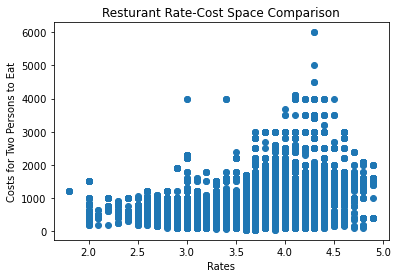

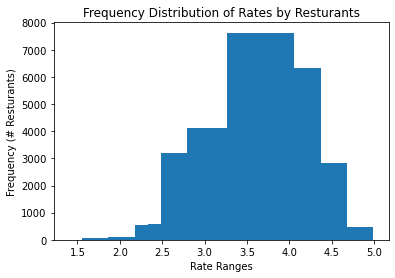

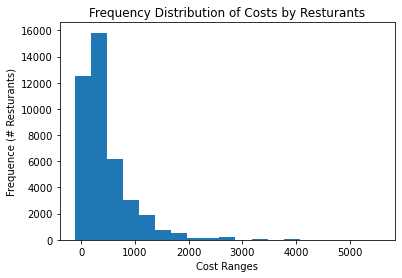

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, regexp_extract, col, split, cast, corr, avg, sum, collect_set, count, asc
from pyspark.sql.types import *
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
spark = SparkSession.builder.appName('Dataframe').getOrCreate()
t0 = time.time()

df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("zomato.csv")
print("Schema of the dataset")
df.printSchema()

print("Query 1. Does average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order?")
df.select('online_order', 'rate').groupBy('online_order').avg().show()
print("Ans: Yes, From above table we can say that average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order.")

print("Query 2. Does average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't accept online table booking?")
df.select('book_table', 'rate').groupBy('book_table').avg().show()
print("Query Ans: Yes, From above table, we can say that average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't online table booking.")

print("Query 3. What are the top 3 locations in bangalore with highest number of restaurants?")
print("Top 3 locations are given below:")
df.groupBy('location').count().sort(col('count').desc()).select('location').show(3,False)

print("Query 4. Which location has highest number of pubs?")
keywords = 'Pub'
df.filter(col('rest_type').contains('Pub')).groupBy('location').count().sort(col('count').desc()).select('location').show(1,False)

print("Query 5. Which is the cheapest restaurant with rating >= 4.9?")
df.where("rate >= 4.9").sort(col('cost_for_two_people')).select('name').show(1,False)

print('Query 6. Displaying the basic statistics using describe function')
df.describe().show()

print('Query 7. Restaurants in whitefield location with cost less than or equal to 1000 and drawing 10 samples randomly')
seed=5
withReplacement = False
fraction = 0.5
df.where(col("location")=="Whitefield").where(col("cost_for_two_people")<=1000).sample(withReplacement,fraction, seed=None).show(10)

print('Query 8. Cheaper restaurants(cost<800) with ratings greater than equal to 4')
df.where(col("cost_for_two_people")<=800).where(col("rate")>=4).orderBy(asc("cost_for_two_people")).show()

print('Query 9. Number of restaurants in Banashankari location')
df.where(col("location")=="Banashankari").select("name").count()

print('Query 10. Restaurants having both "Online order" & "table booking" facilities')
df.withColumn("both", col("book_table")&col("online_order")).where("both").select("book_table","online_order","both").show()

dfCorr = df.withColumnRenamed("cost_for_two_people","cost")
dfCorr = dfCorr.withColumn("online_order", df.online_order.cast('int')).withColumn("book_table", df.book_table.cast('int'))

# is there a correlation between the cost of the restaurant and the ratings
x= dfCorr.corr("cost", "rate")
print("Query 11. The correlation between the cost of the restaurant and ratings is: ", x)

# Do restaurants that offer online booking differ from the ones that offer table bookings

df_cov= dfCorr.stat.cov("online_order", "book_table")
print("Query 12. The direction of the relationship between restaurants that have online booking and table booking is ", df_cov)

# Collect List for Location 

Online = df.groupby('name', 'location', 'online_order').agg(sum('votes').alias('TotalVotes_Online')).withColumnRenamed('online_order', 'Order')
book = df.groupby('name', 'location', 'book_table').agg(sum('votes').alias('TotalVotes_Book')).withColumnRenamed('book_table', 'Book')
table = Online.join(book, ['name', 'location'],  'inner')

df2 = table.groupBy("Location").agg(collect_set("name").alias("Location_Rest"), count("Location").alias(""))
print("Query 13. This table shows the list of restaurants by their locations ")
df2.show()


df.createOrReplaceTempView("data_sql")

### Retrieve max and min rates for binning

numBins = 20 ### Define amount of bins to have
maxCost = float(spark.sql("SELECT max(cost_for_two_people) FROM data_sql").collect()[0][0])
minCost = float(spark.sql("SELECT min(cost_for_two_people) FROM data_sql").collect()[0][0])

### Find differences for binning

diffCost = maxCost - minCost
diffBin = diffCost / numBins

diffBinCost = diffBin

### Initalize counts
costsIndex = []
counts = []

### Binning of costs for histogram
for i in range(numBins-1):
    cost = minCost + i * diffBin
    nextCost = cost + diffBin
    costsIndex.append(cost)
    counts.append(float(df.filter(col("cost_for_two_people") >= cost).filter(col("cost_for_two_people") < nextCost).count()))

### Likewise but with rates to compare the distributions

maxRate = float(spark.sql("SELECT max(rate) FROM data_sql").collect()[0][0])
minRate = float(spark.sql("SELECT min(rate) FROM data_sql").collect()[0][0])

### Find differences for binning

diffRate = maxRate - minRate
diffBin = diffRate / numBins

### Initalize rate counting
ratesIndex = []
countRates = []

### Binning of costs for histogram
for i in range(numBins-1):
    rate = minRate + i * diffBin
    nextRate = rate + diffBin
    ratesIndex.append(rate)
    countRates.append(float(df.filter(col("rate") >= rate).filter(col("rate") < nextRate).count()))


### Collecting data for scatter graph of the rate versus cost
rates = spark.sql("SELECT rate FROM data_sql").collect()
costs = spark.sql("SELECT cost_for_two_people FROM data_sql").collect()

### Initalize empty rates and cost lists for plotting

ratesList = []
costsList = []

### Append float value from each row collected from spark dataframe

for i in range(len(rates)):
    ratesList.append(float(rates[i][0]))
    costsList.append(float(costs[i][0]))


### Form graphs and print in display    

plt.figure()
plt.scatter(ratesList, costsList)
plt.title("Resturant Rate-Cost Space Comparison")
plt.xlabel("Rates")
plt.ylabel("Costs for Two Persons to Eat")

plt.figure()
plt.bar(ratesIndex, countRates)
plt.xlabel("Rate Ranges")
plt.ylabel("Frequency (# Resturants)")
plt.title("Frequency Distribution of Rates by Resturants")

print(costsIndex)

plt.figure()
plt.bar(costsIndex, counts, width=diffBinCost)
plt.xlabel("Cost Ranges")
plt.ylabel("Frequence (# Resturants)")
plt.title("Frequency Distribution of Costs by Resturants")

t1 = time.time()

print("Time taken = " + str(t1 - t0))


Query 1. Does average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order?
   online_order      rate
0         False  3.638881
1          True  3.703276
Ans: Yes, From above table we can say that average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order.
Query 2. Does average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't accept online table booking?
   book_table      rate
0       False  3.600741
1        True  4.127364
Ans: Yes, From above table, we can say that average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't online table booking.
Query 3. What are the top 3 locations in bangalore with highest number of restaurants?
Top 3 locations are given below:
0                      BTM
1    Koramangala 5t

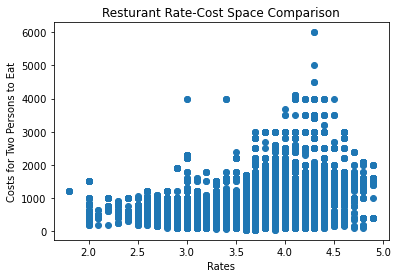

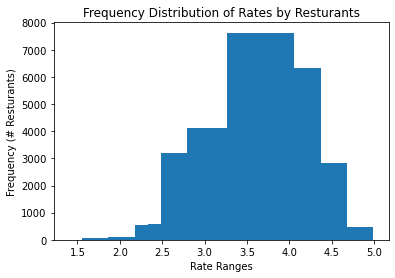

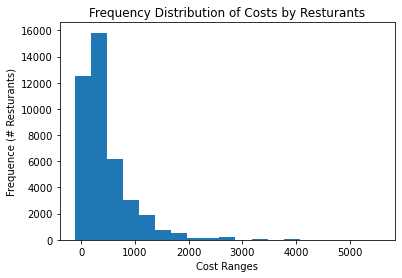

22/12/10 00:41:19 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 262595 ms exceeds timeout 120000 ms
22/12/10 00:41:19 WARN SparkContext: Killing executors is not supported by current scheduler.


In [3]:
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

t0 = time.time()
df = pd.read_csv('zomato.csv')
print("Query 1. Does average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order?")
print(df[['online_order','rate']].groupby('online_order').mean().reset_index())
print("Ans: Yes, From above table we can say that average rating of restaurants who accepts online_order is greater than the average rating of restaurants who don't accept online order.")

print("Query 2. Does average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't accept online table booking?")
print(df[['book_table','rate']].groupby('book_table').mean().reset_index())
print("Ans: Yes, From above table, we can say that average rating of restaurants who accepts online table booking is greater than the average rating of restaurants who don't online table booking.")

print("Query 3. What are the top 3 locations in bangalore with highest number of restaurants?")
print("Top 3 locations are given below:")
print(df.groupby('location').count().sort_values(by='name',ascending=False).reset_index()['location'][0:3])

print("Query 4. Which location has highest number of pubs?")
print("Ans: "+df[df['rest_type'].str.contains('Pub')].reset_index().groupby('location').count().sort_values(by='index',ascending=False).reset_index()['location'][0])

print("Query 5. Which is the cheapest restaurant with rating >= 4.9?")
print("Ans: " + df[df['rate']>=4.9].reset_index().sort_values(by='cost_for_two_people').reset_index()['name'][0])


#finding the basic statistics using describe function
print('Query 6. Displaying the basic statistics using describe function')
print(df.describe())

#finding the restaurant in whitefield location with cost less than or equal to 1000 and drawing 10 samples randomly
print('Query 7. Restaurants in whitefield location with cost less than or equal to 1000 and drawing 10 samples randomly')
moderate_rate=df[(df['location']=='Whitefield') & (df['cost_for_two_people'] <=1000)]
print(moderate_rate.sample(10))

#finding the cheaper restaurants(cost<=800) with ratings gretaer than equal to 4
print('Query 8. Cheaper restaurants(cost<=800) with ratings gretaer than equal to 4')
budget_friendly=(df[(df['rate']>=4 ) & (df['cost_for_two_people'] <=800)])
print(budget_friendly.sort_values(by='cost_for_two_people', ascending=True))

#How many restaurants are there in Banashankari location
print('Query 9. Number of restaurants in Banashankari location')
a=df[(df['location']=='Banashankari')]
print(len(a))

#restaurants having both "Online order" & "table booking" facilities
print('Query 10. Restaurants having both "Online order" & "table booking" facilities')
ot=df[(df['online_order']) & (df['book_table'])]
print(ot[['name','online_order','book_table']])


#1. is there a correlation between the cost of the restaurant and the ratings
col1 = "rate"
col2 = "cost_for_two_people"
col3 = "online_order"

corr = df[col1].corr(df[col2], method='pearson')
print("Query 11. The correlation coefficient between cost and ratings is ", corr)

#3. The covariance of restaurants that offer online orders v book tables 
col3, col4 = "online_order", "book_table"
cleaned_cov = df[col3].cov(df[col4])
print("Query 12. The direction of the relationship between restaurants that have online booking and table booking is", cleaned_cov)

#Restaurant by Location 
cleaned_4 = df.groupby("location").agg(loc_count = ('location', 'count'), loc_rest =('name', 'unique'))
print("Query 13. This table shows the list of restaurants by their locations")
print(cleaned_4)

   
### Retrieve max and min rates for binning

numBins = 20 ### Define amount of bins to have
maxCost = max(df['cost_for_two_people'])
minCost = min(df['cost_for_two_people'])

### Find differences for binning

diffCost = maxCost - minCost
diffBin = diffCost / numBins

diffBinCost = diffBin

### Initalize counts
costsIndex = []
counts = []

### Binning of costs for histogram
for i in range(numBins-1):
    cost = minCost + i * diffBin
    nextCost = cost + diffBin
    costsIndex.append(cost)
    counts.append(df[(df['cost_for_two_people']>= cost) & (df['cost_for_two_people'] < nextCost)]['cost_for_two_people'].count())
### Likewise but with rates to compare the distributions

maxRate = max(df['rate'])
minRate = min(df['rate'])

### Find differences for binning

diffRate = maxRate - minRate
diffBin = diffRate / numBins

### Initalize rate counting
ratesIndex = []
countRates = []

### Binning of costs for histogram
for i in range(numBins-1):
    rate = minRate + i * diffBin
    nextRate = rate + diffBin
    ratesIndex.append(rate)
    countRates.append(df[(df['rate'] >= rate) & (df['rate'] < nextRate)]['rate'].count())


### Collecting data for scatter graph of the rate versus cost
ratesList = df['rate']
costsList = df['cost_for_two_people']

### Form graphs and print in display    

plt.figure()
plt.scatter(ratesList, costsList)
plt.title("Resturant Rate-Cost Space Comparison")
plt.xlabel("Rates")
plt.ylabel("Costs for Two Persons to Eat")

plt.figure()
plt.bar(ratesIndex, countRates)
plt.xlabel("Rate Ranges")
plt.ylabel("Frequency (# Resturants)")
plt.title("Frequency Distribution of Rates by Resturants")

print(costsIndex)

plt.figure()
plt.bar(costsIndex, counts, width=diffBinCost)
plt.xlabel("Cost Ranges")
plt.ylabel("Frequence (# Resturants)")
plt.title("Frequency Distribution of Costs by Resturants")

t1 = time.time()

print("Time taken = " + str(t1 - t0))